# Homework 4

- I attest that this is my own homework

- Aashman Rastogi


# Problem

Recall the simple random walk.  At each step, we flip a fair coin. If heads, we move "foward" one unit; if tails, we move "backward." 

## (A).

Way back in Homework 1, you wrote some code to simulate a random walk in Python. 

Start with this code, or use posted solutions for HW1. If you have since written random walk code that you prefer, you can use this instead. Regardless, take your code, modify it, and enclose it in a function `rw()`. This function should accept a single argument `n`, the length of the walk. The output should be a list giving the position of the random walker, starting with the position after the first step. For example, 

```python
rw(5)
[1, 2, 3, 2, 3]
```

Unlike in the HW1 problem, you should not use upper or lower bounds. The walk should always run for as long as the user-specified number of steps `n`. 

Use your function to print out the positions of a random walk of length `n = 10`. 

Don't forget a helpful docstring! 

In [22]:
# solution (with demonstration) here
from matplotlib import pyplot as plt
import random

def rw(n):
    
    """
    randomly choosing + or - and then carrying out the respective step 
    storing value in p and then incrementing the count. 
    we iterate over this process till the count is <= the specified length 'n' 
    """
    r=[] # storing value of x;
    p=[] # storing position 
    position = 0
    count = 0
    
    while count<=n:
        x=random.choice(["+","-"])
        if x=="+":
            position+=1
            p.append(position)
            r.append(x)
            count+=1
        elif x=="-":
            position-=1
            p.append(position)
            r.append(x)
            count+=1
    return p
    
a = rw(10)
print(a)

[1, 0, 1, 0, 1, 0, 1, 0, -1, -2, -1]


## (B).

Now create a function called `rw2(n)`, where the argument `n` means the same thing that it did in Part A. Do so using `numpy` tools. Demonstrate your function as above, by creating a random walk of length 10. You can (and should) return your walk as a `numpy` array. 

**Requirements**: 

- No for-loops. 
- This function is simple enough to be implemented as a one-liner of fewer than 80 characters, using lambda notation. Even if you choose not to use lambda notation, the body of your function definition should be no more than three lines long. Importing `numpy` does not count as a line. 
- A docstring is required if and only if you take more than one line to define the function. 

**Hints**:

- Check the documentation for `np.random.choice()`. 
- Discussion 9, and `np.cumsum()`. 

In [23]:
# solution (with demonstration) here
import numpy as np
rw2 = lambda n: np.cumsum(np.random.choice([1,-1], n))
"""
np.random.choice randomly choses -1 or 1 
We then use npcumsum to carry out a cumulative sum 'n' number of times
"""
print(rw2(10))

[1 2 3 2 3 4 5 4 3 4]


## (C).

Use the `%timeit` magic macro to compare the runtime of `rw()` and `rw2()`. Test how each function does in computing a random walk of length `n = 10000`. 

In [24]:
# solution (with demonstration) here
import time 
%timeit rw(10000)
%timeit rw2(10000)

7.39 ms ± 353 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
127 µs ± 40.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## (D).

Write a few sentences in which you comment on (a) the performance of each function and (b) the ease of writing and reading each function. 

*Your discussion here*

## (E).

In this problem, we will perform a `d`-dimensional random walk. There are many ways to define such a walk. Here's the definition we'll use for this problem: 

> At each timestep, the walker takes one random step forward or backward **in each of `d` directions.** 

For example, in a two-dimensional walk on a grid, in each timestep the walker would take a step either north or south, and then another step either east or west. Another way to think about is as the walker taking a single "diagonal" step either northeast, southeast, southwest, or northwest. 

Write a function called `rw_d(n,d)` that implements a `d`-dimensional random walk. `n` is again the number of steps that the walker should take, and `d` is the dimension of the walk. The output should be given as a `numpy` array of shape `(n,d)`, where the `k`th row of the array specifies the position of the walker after `k` steps. For example: 

```python
P = rw_d(5, 3)
P
```
```
array([[-1, -1, -1],
       [ 0, -2, -2],
       [-1, -3, -3],
       [-2, -2, -2],
       [-1, -3, -1]])
```

In this example, the third row `P[2,:] = [-1, -3, -3]` gives the position of the walk after 3 steps. 

Demonstrate your function by generating a 3d walk with 5 steps, as shown in the example above. 

All the same requirements and hints from Part B apply in this problem as well. It should be possible to solve this problem by making only a few small modifications to your solution from Part B. If you are finding that this is not possible, you may want to either (a) read the documentation for the relevant `numpy` functions more closely or (b) reconsider your Part B approach. 

In [33]:
# solution (with demonstration) here
import numpy as np
rw_d = lambda n,d: np.concatenate([np.random.choice(a=[1,0,-1],size=(n,d))]).cumsum(0).astype(int)
"""
randomly chosing d number of elements from [-1,0,1] 
concanetaning them depending the on the shape of the array which in this case in (n,d)
we then carry out cumulative sum down the columns 
"""
p=rw_d(5,3)
p

array([[-1,  1,  0],
       [-1,  0, -1],
       [-1,  0, -2],
       [-1, -1, -3],
       [-2,  0, -3]])

## (F).

In a few sentences, describe how you would have solved Part E without `numpy` tools. Take a guess as to how many lines it would have taken you to define the appropriate function. Based on your findings in Parts C and D, how would you expect its performance to compare to your `numpy`-based function from Part E? Which approach would your recommend? 

Note: while I obviously prefer the `numpy` approach, it is reasonable and valid to prefer the "vanilla" way instead. Either way, you should be ready to justify your preference on the basis of writeability, readability, and performance. 

*Your discussion here*

## (G).

Once you've implemented `rw_d()`, you can run the following code to generate a large random walk and visualize it. 

```python
from matplotlib import pyplot as plt

W = rw_d(20000, 2)
plt.plot(W[:,0], W[:,1])
```

You may be interested in looking at several other visualizations of multidimensional random walks [on Wikipedia](https://en.wikipedia.org/wiki/Random_walk). Your result in this part will not look exactly the same, but should look qualitatively fairly similar. 

You only need to show one plot. If you like, you might enjoy playing around with the plot settings. While `ax.plot()` is the normal method to use here, `ax.scatter()` with partially transparent points can also produce some intriguing images. 

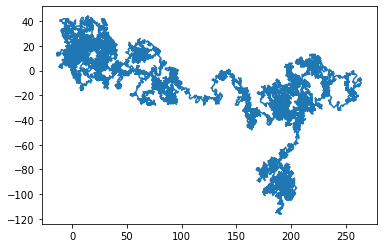

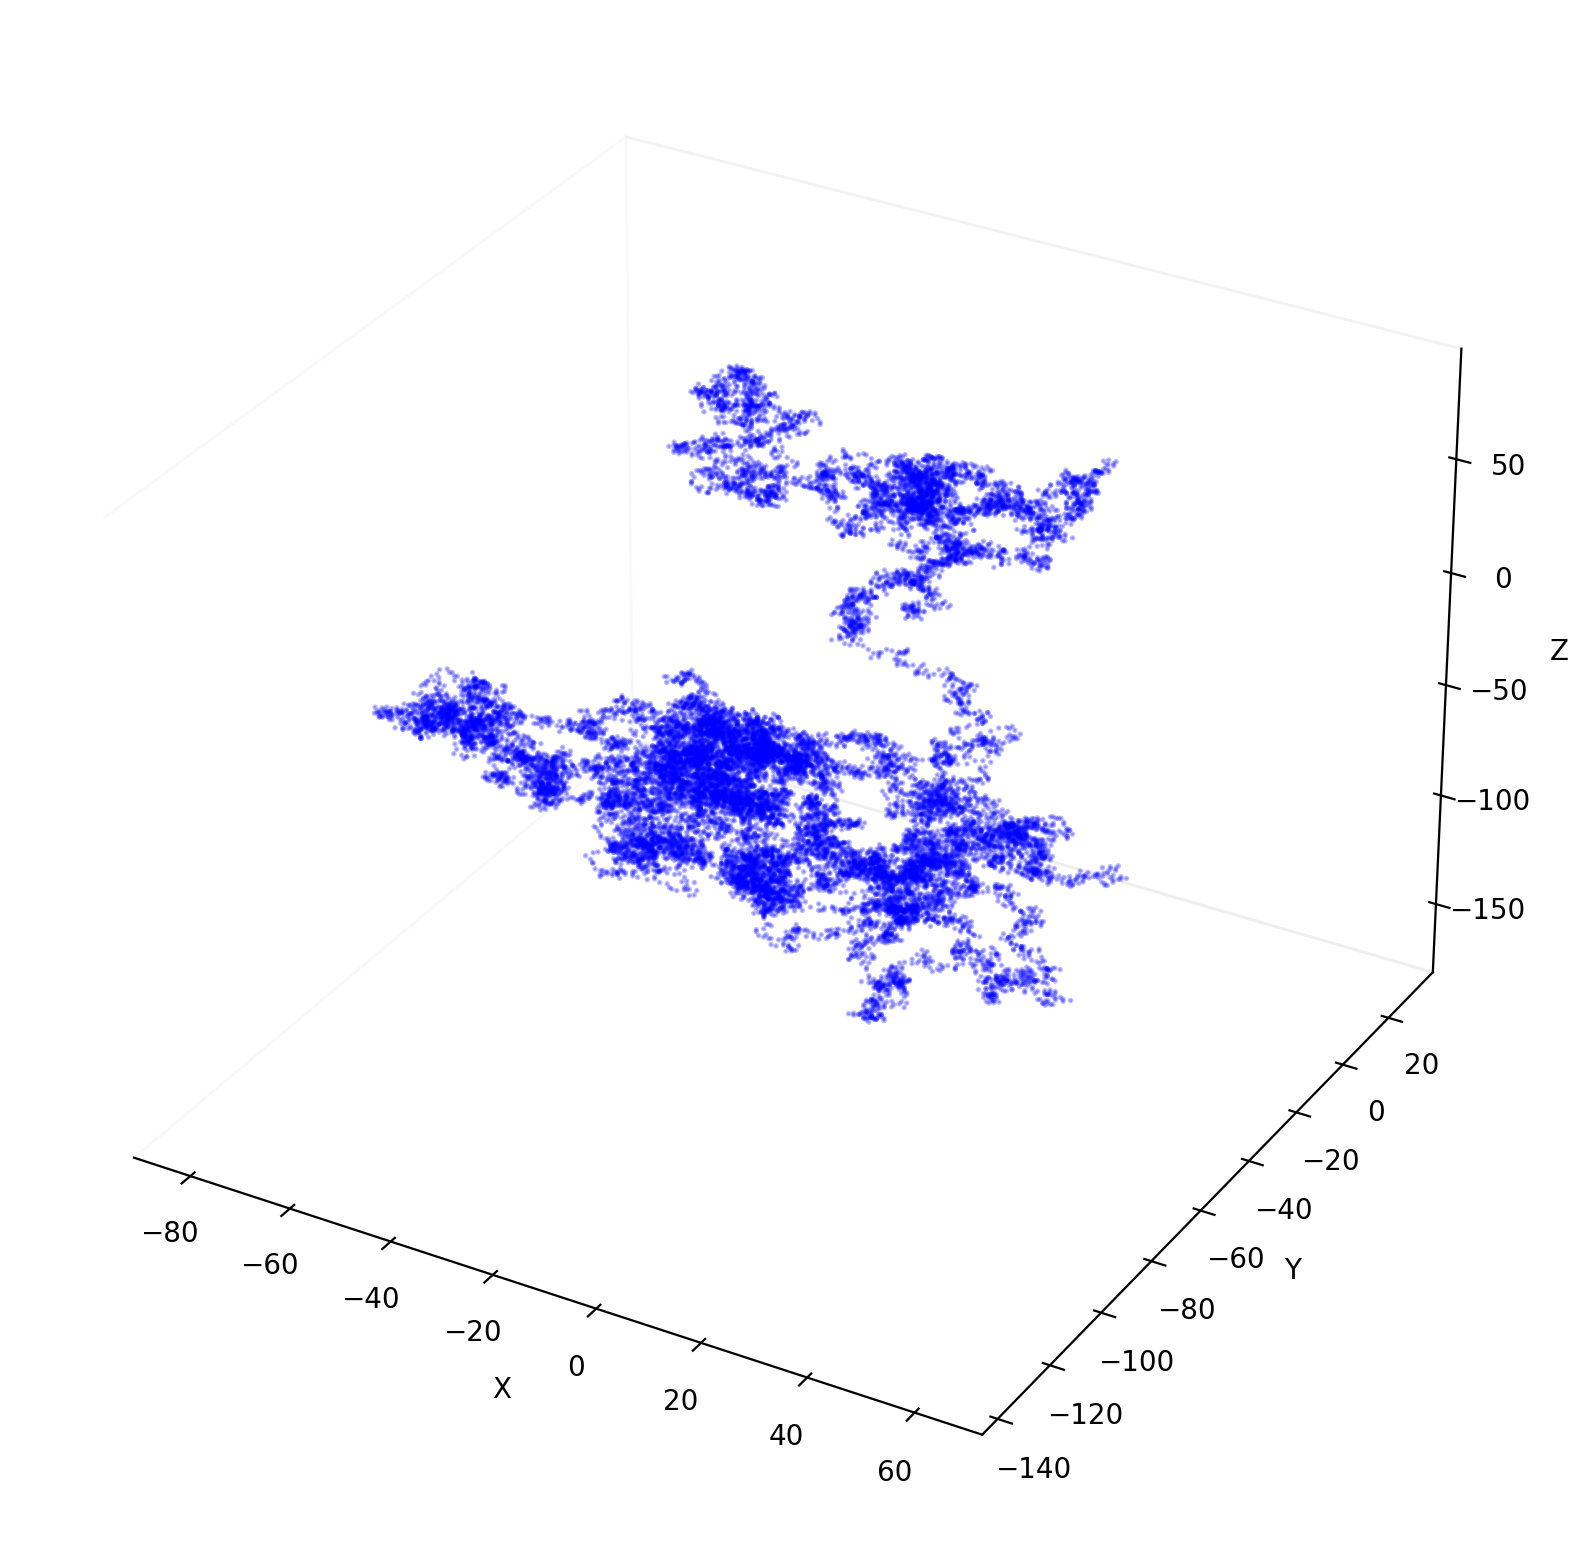

In [90]:
# solution (with demonstration) here
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

"""
Printing the randon walk in 2d
"""
from matplotlib import pyplot as plt

W = rw_d(20000, 2)
plt.plot(W[:,0], W[:,1])

"""
printing the random walk in 3d 
"""
fig = plt.figure(figsize=(10,10),dpi=200)
ax = fig.add_subplot(111, projection='3d')
ax.grid(False)
ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

W = rw_d(20000, 3)
ax.scatter3D(W[:,0],W[:,1], W[:,2], 
             c='blue', alpha=0.25,s=1)

